In [1]:
import numpy as np
import pickle
import string

from collections import Counter
from matplotlib import pyplot as plt
from os import listdir


def get_most_frequent_words(all_words, k):
    counter = Counter(all_words)
    return [pair[1] / len(all_words) for pair in counter.most_common(k)]
    
    
def get_most_frequent_words_in_files(k=5000):
    texts = [pickle.load(open(f'clean_files/{filename}', 'rb'))['text']\
             for filename in listdir('clean_files')]
    punct_remover = str.maketrans('', '', string.punctuation)

    all_words = [word for text in texts for word in text.translate(punct_remover).lower().split()]
    return get_most_frequent_words(all_words, k)

In [2]:
top_words = get_most_frequent_words_in_files()

In [3]:
def approximate_zipf(freqs):
    best_s = 1
    best_k = 1
    best_loss = 1e9
    
    for s in np.linspace(0.25, 3.0, 100):    
        k = np.mean(freqs * (np.arange(1, len(freqs) + 1)**s))
        loss = np.mean((freqs - k/(np.arange(1, len(freqs) + 1)**s))**2)
        
        if loss < best_loss:
            best_loss, best_s, best_k = loss, s, k
    
    print('mse', best_loss)
    plt.figure(figsize=(10, 7))
    plt.plot(freqs)
    plt.plot(
        best_k / (np.arange(1, len(freqs) + 1)**best_s),
        label='$\\frac{' + str(round(best_k, 3)) + '}{r^{' + str(round(best_s, 3)) + '}}$'
    )
    plt.legend(fontsize=18)
    plt.title(f'Top {len(freqs)} words', fontsize=22)
    plt.show()

mse 7.4153103697921255e-06


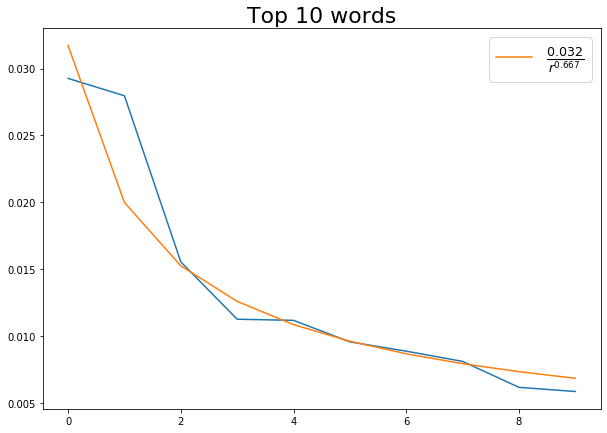

In [4]:
approximate_zipf(top_words[:10])

mse 1.1101142377338063e-06


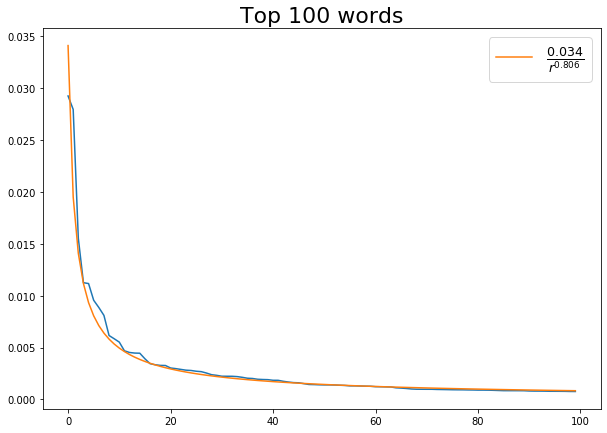

In [5]:
approximate_zipf(top_words[:100])

mse 2.463765314297716e-07


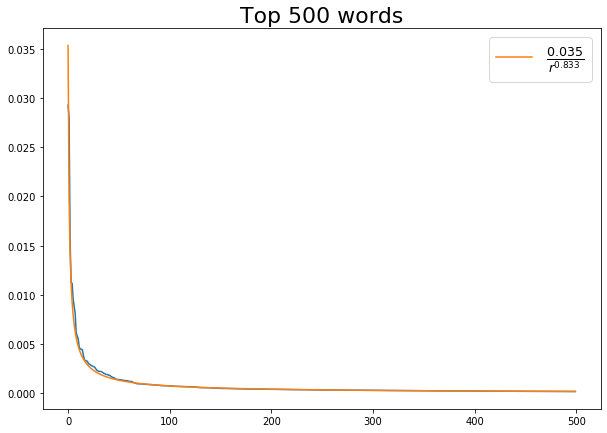

In [6]:
approximate_zipf(top_words[:500])

mse 1.2886736813189674e-07


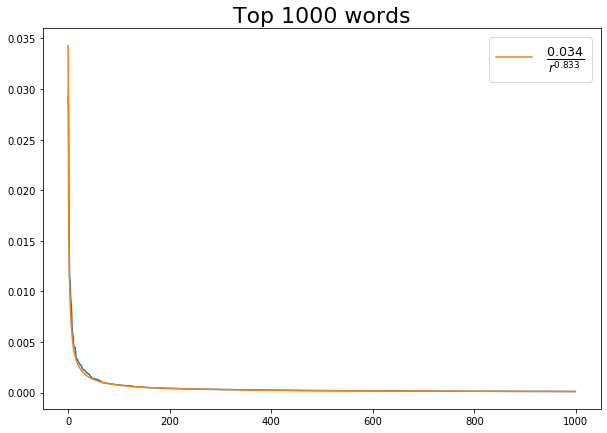

In [7]:
approximate_zipf(top_words[:1000])

mse 2.8607060064291543e-08


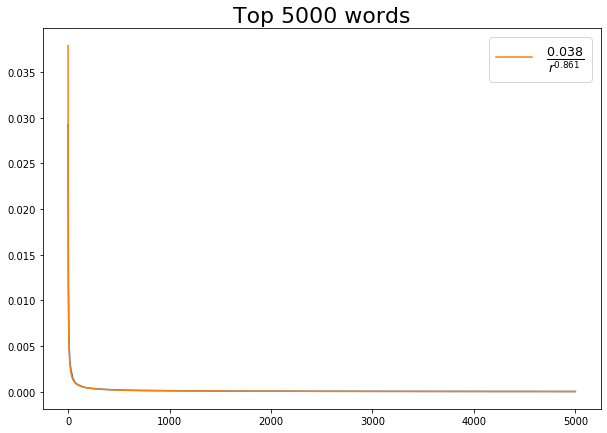

In [8]:
approximate_zipf(top_words[:5000])